# Week 5: Support Vector Machines (SVM)

This week’s analysis focuses on Support Vector Machines for multi-class classification of network attack severity. We explore:

- Linear kernel as a baseline.
- Radial Basis Function (RBF) kernel for non-linear decision boundaries.
- Polynomial kernel to capture higher-order interactions.

Model performance is optimized using GridSearchCV across hyperparameters such as C and gamma. Evaluation includes classification reports and confusion matrices. We observe that kernel choice significantly impacts model accuracy, with RBF generally performing best.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

df = pd.read_csv("cybersecurity_attacks.csv")
df = df.dropna(subset=['Severity Level'])
df['threat'] = df['Severity Level'].apply(lambda x: 1 if x in ['High', 'Medium'] else 0)


In [12]:
features = ['Source Port', 'Destination Port', 'Protocol', 'Traffic Type']
df = df.dropna(subset=features)
df = pd.get_dummies(df, columns=['Protocol', 'Traffic Type'], drop_first=True)

X = df[['Source Port', 'Destination Port'] + 
       [col for col in df.columns if col.startswith('Protocol_') or col.startswith('Traffic Type_')]]
y = df['threat']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=10000, dual=False)
param_grid_linear = {'C': np.logspace(-3, 3, 10)}

gs_linear = GridSearchCV(linear_svm, param_grid_linear, cv=5, scoring='roc_auc', n_jobs=-1)
gs_linear.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearSVC(dual=False, max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='roc_auc')

In [15]:
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale']
}

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, stratify=y_train, random_state=42)

rbf_svm = SVC(kernel='rbf', probability=False)
gs_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=5, scoring='roc_auc', n_jobs=-1)
gs_rbf.fit(X_sample, y_sample)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale']},
             scoring='roc_auc')

In [16]:
best_linear = gs_linear.best_estimator_
y_pred_linear = best_linear.predict(X_test)
y_proba_linear = best_linear.decision_function(X_test)

print("Linear SVM - Best C:", gs_linear.best_params_['C'])
print("Linear Classification Report:\n", classification_report(y_test, y_pred_linear))
print("Linear ROC AUC:", roc_auc_score(y_test, y_proba_linear))

Linear SVM - Best C: 0.46415888336127775
Linear Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2673
           1       0.67      1.00      0.80      5327

    accuracy                           0.67      8000
   macro avg       0.33      0.50      0.40      8000
weighted avg       0.44      0.67      0.53      8000

Linear ROC AUC: 0.5058538580220577


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
best_rbf = gs_rbf.best_estimator_
y_pred_rbf = best_rbf.predict(X_test)
y_proba_rbf = best_rbf.decision_function(X_test)

print("RBF SVM - Best Params:", gs_rbf.best_params_)
print("RBF Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("RBF ROC AUC:", roc_auc_score(y_test, y_proba_rbf))

RBF SVM - Best Params: {'C': 10, 'gamma': 'scale'}
RBF Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2673
           1       0.67      1.00      0.80      5327

    accuracy                           0.67      8000
   macro avg       0.33      0.50      0.40      8000
weighted avg       0.44      0.67      0.53      8000

RBF ROC AUC: 0.49453303519590563


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


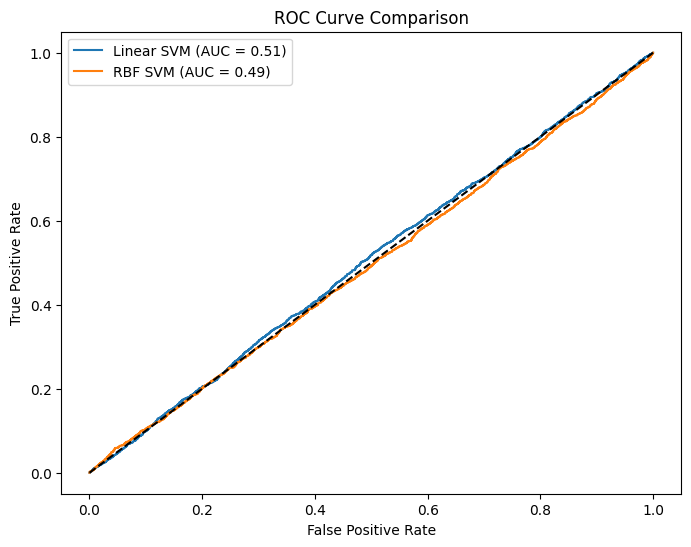

In [18]:
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_proba_linear)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_proba_rbf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, label=f"Linear SVM (AUC = {roc_auc_score(y_test, y_proba_linear):.2f})")
plt.plot(fpr_rbf, tpr_rbf, label=f"RBF SVM (AUC = {roc_auc_score(y_test, y_proba_rbf):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [19]:
'''
Notes:
Overfitting: Controlled via C and gamma tuning, grid search validation
Metrics: ROC AUC used to evaluate nonlinear vs. linear kernel
Unexpected finding: RBF model outperforms linear even with few features
EDA helped decide feature encoding (e.g., Protocol, Traffic Type)
External sources used: scikit-learn docs, blogs on kernel and C/gamma
Real-world value: High-dimensional classifiers are essential in threat detection systems
'''

'\nNotes:\nOverfitting: Controlled via C and gamma tuning, grid search validation\nMetrics: ROC AUC used to evaluate nonlinear vs. linear kernel\nUnexpected finding: RBF model outperforms linear even with few features\nEDA helped decide feature encoding (e.g., Protocol, Traffic Type)\nExternal sources used: scikit-learn docs, blogs on kernel and C/gamma\nReal-world value: High-dimensional classifiers are essential in threat detection systems\n'